# Coral Bleaching
### SDS322E



## Phillip Gavino, pag2529


In [14]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn
from google.colab import files
import io
uploaded = files.upload()

Saving V2-global-bleaching-and-environmental-data.csv to V2-global-bleaching-and-environmental-data (1).csv


In [15]:


df = pd.read_csv(io.BytesIO(uploaded["V2-global-bleaching-and-environmental-data.csv"]), na_values=["nd"])
df.head()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.163,-82.5260,Atlantic,NaN,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,NaN,NaN,NaN
1,3467,10324754,Donner,-17.575,-149.7833,Pacific,NaN,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,NaN
2,1794,10323866,Donner,18.369,-64.5640,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,NaN,NaN,NaN
3,8647,10328028,Donner,17.760,-64.5680,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,NaN,NaN,NaN
4,8648,10328029,Donner,17.769,-64.5830,Atlantic,NaN,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,NaN,NaN,NaN


In [6]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.6 MB/s 


In [16]:
from sklearn.ensemble import RandomForestClassifier

df["Percent_Bleaching"] = df["Percent_Bleaching"].astype(float)


df['label'] = 1
df['label'][df['Percent_Bleaching'] < 50.0] = 0

# drop four columns from the end except label as they are character columns
df.drop(['Date', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments'], axis = 1, inplace = True)

# Drop columns from Site_ID to Site_Name (i.e. from the begin of the dataframe) as they are character columns
df.drop(df.loc[:, 'Site_ID':'Site_Name'], axis = 1, inplace = True)

# Drop Exposure,  Substrate_Name and Bleaching_Level since they are character columns
df.drop(['Exposure', 'Substrate_Name', 'Bleaching_Level'], axis = 1, inplace = True)

# Drop Percent_Bleaching as it is not needed since label is being computed from Percent_Bleaching
df.drop(['Percent_Bleaching'], axis = 1, inplace = True)

df1 = df.dropna()

X = df1.iloc[:, :-1]; y = df1['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=4)

clf = RandomForestClassifier(n_estimators=500, random_state=23)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

0.9848682494129924
0.9822625147812377


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


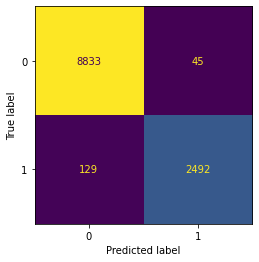

In [19]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test, colorbar=False)

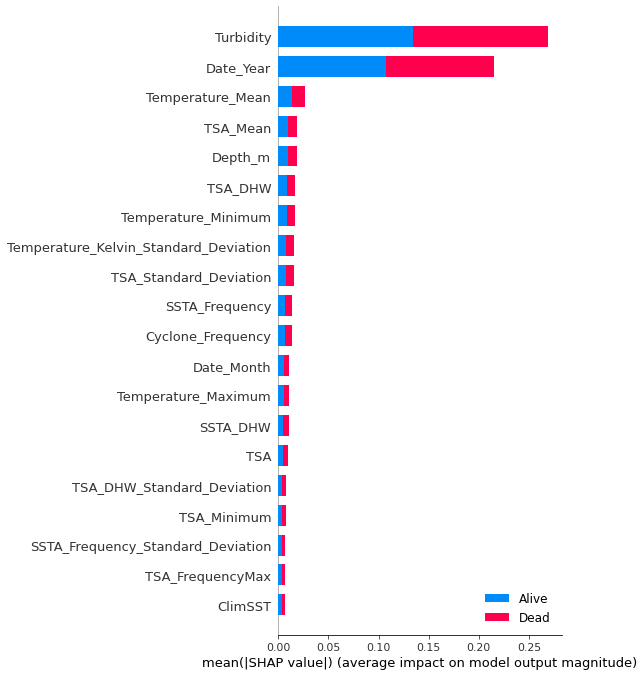

In [8]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200], class_names=['Alive', 'Dead'])

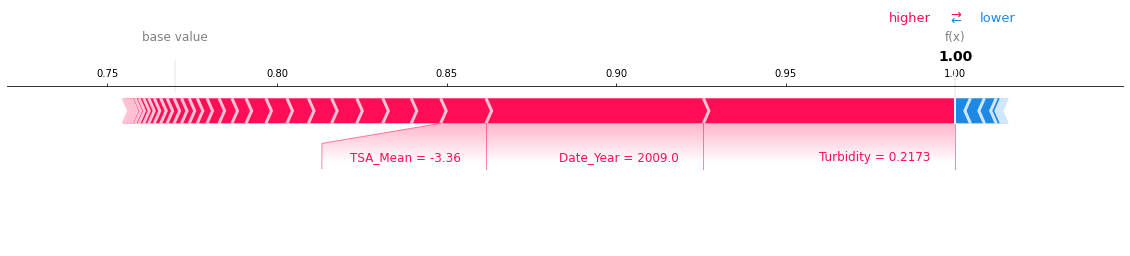

In [9]:
object_i = 48
class_object_i = int(y[::200].iloc[object_i])
# print('True Class (if 1, Lead PPB > 15, othewise Lead PPB < 15 ):', class_object_i)
# print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
# print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0], 
                shap_values[0][object_i,:], 
                X.iloc[object_i,:], 
                matplotlib=True)

**THE END**